In [1]:
import numpy as np

## <center>Elements Of Data Science - F2020</center>
# <center>Week 3: Pandas, Data Exploration and Visualization<center>
### <center>9/28/2020</center>
    


# TODOs

- **Read** Practical Statistics for Data Scientists, Chapter 3 [EBSCO](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3dnlebk%26AN%3d1517577%26site%3dehost-live%26scope%3dsite%26ebv%3DEB%26ppid%3Dpp_79)
- (Optional) Data Science From Scratch, Chapter 5,6,7 [EBSCO](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3dnlebk%26AN%3d979529%26site%3dehost-live%26scope%3dsite%26ebv%3DEB%26ppid%3Dpp_57)
- (Optional) Seaborn Tutorial [https://seaborn.pydata.org/tutorial.html](https://seaborn.pydata.org/tutorial.html)
<br>
 
- Complete Week 3 Quiz
<br>

- HW1 next week, after Hypothesis Testing

<br>
<br>

# <center>Questions?</center>
<br>
<br>


# TODAY
<br>

- Pandas

- Data Exploration

- Visualization in Python

# Intro to Pandas

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/640px-Pandas_logo.svg.png?1600627785917" width="300px">

Pandas is an open source, BSD-licensed library providing:

- **high-performance, easy-to-use data structures** and

- **data analysis tools**
<br>

In [2]:
# usually imported as pd
import pandas as pd

- **Series**: 1D array with a flexible index
- **Dataframe**: 2D matrix with flexible index and column names   

# Pandas Series

- 1D array of data (any numpy datatype) plus an associated **index** array

In [3]:
s = pd.Series(np.random.rand(4))
s

0    0.045003
1    0.500485
2    0.502491
3    0.577879
dtype: float64

In [4]:
# return the values of the series
s.values

array([0.04500301, 0.50048463, 0.50249066, 0.57787909])

In [5]:
# return the index of the series
s.index

RangeIndex(start=0, stop=4, step=1)

# Pandas Series Cont.

- index is flexible, can be anything hashable (integers, strings, ...)

In [6]:
# create Series from array and set index
s = pd.Series(np.random.rand(3),index=['a','b','c'])
s

a    0.783338
b    0.634322
c    0.739958
dtype: float64

In [7]:
s['a']

0.7833376791406063

In [8]:
s[['b','c']]

b    0.634322
c    0.739958
dtype: float64

# Pandas Series Cont.

In [9]:
# Can create series with index from a dictionary
s = pd.Series({'a':1,'b':2,'c':3,'d':4})
s

a    1
b    2
c    3
d    4
dtype: int64

In [10]:
s[s.index[-2:]]

c    3
d    4
dtype: int64

# Pandas DataFrame

- tabular datastructure
<br>

- each column a single datatype
<br>

- contains both row and column indices
<br>

- single column == Series

# Pandas DataFrame Cont.

In [11]:
df = pd.DataFrame({'Year':[2017,2018,2018,2019],
                   'Class_Name':['A','A','B','A'],
                   'Measure1':[2.1,3.0,2.4,1.9]
                  })

In [12]:
df

,Year,Class_Name,Measure1
0,2017,A,2.1
1,2018,A,3.0
2,2018,B,2.4
3,2019,A,1.9


In [13]:
print(df)

   Year Class_Name  Measure1
0  2017          A       2.1
1  2018          A       3.0
2  2018          B       2.4
3  2019          A       1.9


In [14]:
display(df)

,Year,Class_Name,Measure1
0,2017,A,2.1
1,2018,A,3.0
2,2018,B,2.4
3,2019,A,1.9


# Pandas DataFrame Cont.

In [15]:
data = [[2017,'A',2.1],
        [2018,'A',3.0],
        [2018,'B',2.4],
        [2019,'A',1.9]]

In [16]:
df = pd.DataFrame(data,
                  columns=['Year','Class_Name','Measure1'],
                  index=['001','002','003','004'])
df.shape

(4, 3)

In [17]:
df

,Year,Class_Name,Measure1
001,2017,A,2.1
002,2018,A,3.0
003,2018,B,2.4
004,2019,A,1.9


# Pandas Attributes

- Get shape of DataFrame : `shape`

In [18]:
df.shape # rows, columns

(4, 3)

- Get index values : `index`

In [19]:
df.index

Index(['001', '002', '003', '004'], dtype='object')

- Get column values : `columns`

In [20]:
df.columns

Index(['Year', 'Class_Name', 'Measure1'], dtype='object')

# Pandas Indexing/Selection

Select by label:
- `.loc[]`

In [21]:
df.loc['001']

Year          2017
Class_Name       A
Measure1       2.1
Name: 001, dtype: object

In [22]:
df.loc['001','Measure1']

2.1

# Pandas Indexing/Selection Cont.

Select by position:
- `.iloc[]`

In [23]:
df.iloc[0]

Year          2017
Class_Name       A
Measure1       2.1
Name: 001, dtype: object

In [24]:
df.iloc[0,2]

2.1

# Pandas Indexing/Selection Cont.

Selecting multiple rows/columns: use list (fancy indexing)

In [25]:
df.loc[['002','004']]

,Year,Class_Name,Measure1
002,2018,A,3.0
004,2019,A,1.9


In [26]:
df.loc[['002','004'],['Year','Measure1']]

,Year,Measure1
002,2018,3.0
004,2019,1.9


# Pandas Slicing

In [27]:
# Get last two rows
df.iloc[-2:]

,Year,Class_Name,Measure1
003,2018,B,2.4
004,2019,A,1.9


In [28]:
# Get first two rows and first two columns
df.iloc[:2,:2]

,Year,Class_Name
001,2017,A
002,2018,A


**NOTE:** `.iloc` is **exclusive** (start:end+1)

# Pandas Slicing Cont.

Can also slice using labels:

In [29]:
df.loc['002':'004']

,Year,Class_Name,Measure1
002,2018,A,3.0
003,2018,B,2.4
004,2019,A,1.9


In [30]:
df.loc['002':'004',:'Class_Name']

,Year,Class_Name
002,2018,A
003,2018,B
004,2019,A


**NOTE**: `.loc` is **inclusive**

# Pandas Slicing Cont.

How to indicate all rows or all columns? `:`

In [31]:
df.loc[:,'Measure1']

001    2.1
002    3.0
003    2.4
004    1.9
Name: Measure1, dtype: float64

In [32]:
df.iloc[2:,:]

,Year,Class_Name,Measure1
003,2018,B,2.4
004,2019,A,1.9


# Pandas Indexing Cont.

Shortcut for indexing:
    

In [33]:
df['Class_Name']

001    A
002    A
003    B
004    A
Name: Class_Name, dtype: object

In [34]:
# can use dot notation if there is no space in label
df.Class_Name

001    A
002    A
003    B
004    A
Name: Class_Name, dtype: object

# Panda Selection Chaining

Get 'Year' and 'Measure1' for first 3 rows:

In [35]:
df.iloc[:3].loc[:,['Year','Measure1']]

,Year,Measure1
001,2017,2.1
002,2018,3.0
003,2018,2.4


For records '001' and '003' get last two columns

In [36]:
df.loc[['001','003']].iloc[:,-2:]

,Class_Name,Measure1
001,A,2.1
003,B,2.4


# Panda Selection Chaining Cont.

For record '001' get last two columns?:

In [37]:
%xmode minimal
df.loc['001'].iloc[:,-2:] # row with label '001', then all rows, last two columns?

Exception reporting mode: Minimal


IndexingError: Too many indexers

In [38]:
df.loc['001']

Year          2017
Class_Name       A
Measure1       2.1
Name: 001, dtype: object

In [39]:
df.loc['001'].iloc[-2:] # row with label '001', last two elements of Series

Class_Name      A
Measure1      2.1
Name: 001, dtype: object

# Pandas `head` and `tail`

Get a quick view of the first or last rows in a DataFrame

In [40]:
df.head() # first 5 rows by default

,Year,Class_Name,Measure1
001,2017,A,2.1
002,2018,A,3.0
003,2018,B,2.4
004,2019,A,1.9


In [41]:
df.tail(2) # only print 2 rows

,Year,Class_Name,Measure1
003,2018,B,2.4
004,2019,A,1.9


# Pandas Boolean Mask

In [42]:
# Which rows have Class_Name of 'A'?
df.Class_Name == 'A'

001     True
002     True
003    False
004     True
Name: Class_Name, dtype: bool

In [43]:
# Get all data for rows with with Class_Name 'A'
df.loc[df.Class_Name == 'A']

,Year,Class_Name,Measure1
001,2017,A,2.1
002,2018,A,3.0
004,2019,A,1.9


In [44]:
# Get Measure1 for all records for Class_Name 'A'
df.loc[df.Class_Name == 'A','Measure1']

001    2.1
002    3.0
004    1.9
Name: Measure1, dtype: float64

# Pandas Boolean Mask Cont.

Get all records for class 'A' before 2019

In [45]:
df.loc[(df.Class_Name == 'A') & (df.Year < 2019)]

,Year,Class_Name,Measure1
001,2017,A,2.1
002,2018,A,3.0


Get all records in a set of years:

In [46]:
df.loc[df.Year.isin([2017,2019])]

,Year,Class_Name,Measure1
001,2017,A,2.1
004,2019,A,1.9


# Pandas Selection Review

- `.loc[]`

- `.iloc[]`

- Fancy Indexing

- Slicing

- Chaining

- `head` and `tail`

- Boolean Mask


# Pandas Sorting

In [47]:
df.sort_values(by=['Measure1']).head(3)

,Year,Class_Name,Measure1
004,2019,A,1.9
001,2017,A,2.1
003,2018,B,2.4


In [48]:
df.sort_values(by=['Measure1'],ascending=False).head(3)

,Year,Class_Name,Measure1
002,2018,A,3.0
003,2018,B,2.4
001,2017,A,2.1


In [49]:
df.sort_values(by=['Year','Measure1']).head(3)

,Year,Class_Name,Measure1
001,2017,A,2.1
003,2018,B,2.4
002,2018,A,3.0


<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Data Exploration and Visualization

## For a new set of data, would like to know:
- amount of data (rows, columns)
- range (min, max)
- counts of discrete values
- central tendencies (mean, median)
- dispersion or spread (variance, IQR)
- skew
- covariance and correlation
...

# Yellowcab Dataset

- Records of Yellowcab Taxi trips from January 2017
- more info: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

# Loading Datasets from CSV (Comma Separated Values)

- columns separated by delimiter, eg. comma, tab (\t), pipe (|)
- one row per record, observation
- often, strings quoted
- often, first row contains column headings
- often, comment rows starting with #

In [50]:
!head ../data/yellowcab_demo.csv

pickup_datetime,dropoff_datetime,trip_distance,fare_amount,tip_amount,payment_type
2017-01-05 14:49:04,2017-01-05 14:53:53,0.89,5.5,1.26,Credit card
2017-01-15 01:07:22,2017-01-15 01:26:47,2.7,14.0,0.0,Cash
2017-01-29 09:55:00,2017-01-29 10:04:43,1.41,8.0,0.0,Cash
2017-01-10 05:40:12,2017-01-10 05:42:22,0.4,4.0,0.0,Cash
2017-01-06 17:02:48,2017-01-06 17:16:10,2.3,11.0,0.0,Cash
2017-01-14 19:03:14,2017-01-14 19:08:41,0.8,5.5,,Credit card
2017-01-06 18:51:52,2017-01-06 18:55:45,0.2,4.5,0.0,Cash
2017-01-04 20:47:30,2017-01-04 21:01:24,2.68,11.5,,Credit card
2017-01-21 09:44:28,2017-01-21 09:48:13,0.6,4.5,0.0,Cash


# Loading Datasets with Pandas

In [51]:
import pandas as pd
df = pd.read_csv('../data/yellowcab_demo.csv',
                 sep=',',
                 header=0,
                 parse_dates=['pickup_datetime','dropoff_datetime'])

In [52]:
# display first 5 rows
df.head(5)

,pickup_datetime,dropoff_datetime,trip_distance,fare_amount,tip_amount,payment_type
0,2017-01-05 14:49:04,2017-01-05 14:53:53,0.89,5.5,1.26,Credit card
1,2017-01-15 01:07:22,2017-01-15 01:26:47,2.70,14.0,0.00,Cash
2,2017-01-29 09:55:00,2017-01-29 10:04:43,1.41,8.0,0.00,Cash
3,2017-01-10 05:40:12,2017-01-10 05:42:22,0.40,4.0,0.00,Cash
4,2017-01-06 17:02:48,2017-01-06 17:16:10,2.30,11.0,0.00,Cash


# Get Size of Dataset

In [53]:
df.shape

(1000, 6)

In [54]:
# rows 
f'{df.shape[0]} rows'
'1000 rows'

'1000 rows'

In [55]:
f'{df.shape[1]} columns'
'6 columns'

'6 columns'

In [56]:
'number of rows: {}, number of columns: {}'.format(*df.shape)

'number of rows: 1000, number of columns: 6'

# What are the column names?

In [57]:
df.columns

Index(['pickup_datetime', 'dropoff_datetime', 'trip_distance', 'fare_amount',
       'tip_amount', 'payment_type'],
      dtype='object')

In [58]:
df.columns.values

array(['pickup_datetime', 'dropoff_datetime', 'trip_distance',
       'fare_amount', 'tip_amount', 'payment_type'], dtype=object)

In [59]:
df.columns.tolist()

['pickup_datetime',
 'dropoff_datetime',
 'trip_distance',
 'fare_amount',
 'tip_amount',
 'payment_type']

# What are the column datatypes?

In [60]:
df.dtypes

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
trip_distance              float64
fare_amount                float64
tip_amount                 float64
payment_type                object
dtype: object

In [61]:
type(df.dtypes)

pandas.core.series.Series

# Get Summary Info for DataFrame

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pickup_datetime   1000 non-null   datetime64[ns]
 1   dropoff_datetime  1000 non-null   datetime64[ns]
 2   trip_distance     1000 non-null   float64       
 3   fare_amount       1000 non-null   float64       
 4   tip_amount        910 non-null    float64       
 5   payment_type      1000 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 47.0+ KB


- number of rows
- number of columns
- column names, number of filled values, datatypes
- number of each datatype seen
- size of dataset in memory

# Variable (Observation) Types

- **Numeric** (eg. weight, temperature)
 - usually has a zero value
 - describes magnitude

- **Categorical** (eg. class, variety)
 - usually a finite set
 - no order

- **Ordinal** (eg. Likert scale, education level, etc.)
 - usually a finite set
 - has order
 - usually missing zero
 - difference between levels may not be the same

# Numeric: Data Ranges

In [63]:
df.trip_distance.min()

0.0

In [64]:
df.trip_distance.max()

32.77

In [65]:
df.min(numeric_only=True)

trip_distance    0.0
fare_amount      2.5
tip_amount       0.0
dtype: float64

In [66]:
df.max(numeric_only=True)

trip_distance    32.77
fare_amount      88.00
tip_amount       22.70
dtype: float64

# Numeric: Central Tendency with Mean

- Sample Mean

<center>$\Large \bar{x} = \frac{1}{n} \sum x_i$</center>

In [67]:
df.fare_amount.mean()

12.4426

In [68]:
print(f'{df.fare_amount.mean()=:0.2f}')

df.fare_amount.mean()=12.44


- Mean is sensitive to *outliers*

- **Outlier:** a data point that differs significantly from other observations
 - data error
 - effect of heavy tailed distribution?

# Numeric: Central Tendency with Median

- Median
 - Divides sorted dataset into two equal sizes
 - 50% of the data is less than or equal to the median

In [69]:
df.fare_amount.median()

9.0

- Median is *robust* to outliers
- **Robust:** Not affected by outliers

# Numeric: Quantiles/Percentiles

- **Quantile:**: cut point for splitting distribution
- **Percentile:** $x$% of data is less than or equal to the $x$th percentile

In [70]:
df.fare_amount.quantile(.95) # 95% of the data is less than or equal to x?

33.5

In [71]:
df.fare_amount.quantile([.05,.95]) # 90% of the data is between 4 and 33.5

0.05     4.0
0.95    33.5
Name: fare_amount, dtype: float64

In [72]:
df.fare_amount.quantile([0,.25,.5,.75,1]) # Quartiles: 25% of data is between each pair

0.00     2.5
0.25     6.5
0.50     9.0
0.75    14.0
1.00    88.0
Name: fare_amount, dtype: float64

# Numeric: Spread with Variance

- Sample Variance
<center>$\Large s^2 = \frac{\sum(x-\bar{x})^2}{n-1}$</center>


In [73]:
df.fare_amount.var()

116.80859383383383

but this is in $\text{dollars}^2$!

# Numeric: Spread with Standard Deviation

- Sample Standard Deviation
<center>$\Large s = \sqrt{\frac{\sum(x-\bar{x})^2}{n-1}}$</center>

In [74]:
df.fare_amount.std()

10.807802451647321

- Back in original scale of dollars
- Sensitive to outliers

# Numeric: Exploring Spread with IQR

- Quartiles
 - ~25% of data is ≤ first quartile, 25th percentile
 - ~50% of data is ≤ second quartile, 50th percentile (Median)
 - ~75% of data is ≤ third quartile, 75th percentile

- Can find quartiles with: pandas quantile or numpy percentile

- **Interquartile Range (IQR)**
 - (third quartile - first quartile) or (75th percentile - 25th percentile)

In [75]:
df.fare_amount.quantile(.75) - df.fare_amount.quantile(.25)

7.5

- IQR is robust to outliers

# Numeric Summary Stats with `.describe`

In [76]:
df.describe()

,trip_distance,fare_amount,tip_amount
count,1000.000000,1000.000000,910.000000
mean,2.880010,12.442600,1.766275
std,3.678534,10.807802,2.315507
min,0.000000,2.500000,0.000000
25%,0.950000,6.500000,0.000000
50%,1.565000,9.000000,1.350000
75%,3.100000,14.000000,2.460000
max,32.770000,88.000000,22.700000


# Numeric: Exploring Distribution with Skew

- **Skewness**
 - measures assymetry of distribution around mean
 - indicates tail to left (neg) or right (pos)
 - skew will lead to difference between median and mean

In [77]:
df.fare_amount.skew()

2.882730031010152

Easier to understand with a plot...

# Matplotlib.pyplot

In [78]:
import matplotlib.pyplot as plt

%matplotlib inline

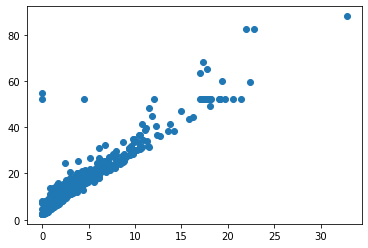

In [79]:
plt.scatter(df.trip_distance,df.fare_amount)

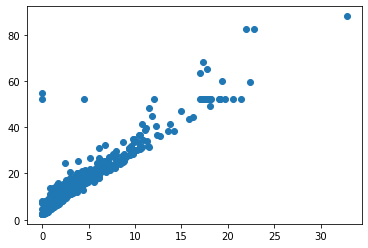

In [80]:
plt.scatter(df.trip_distance,df.fare_amount);

# Matplotlib Axes

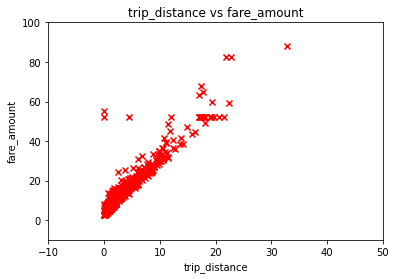

In [81]:
fig = plt.figure(figsize=(6,4))

ax = fig.gca()

ax.scatter(x=df.trip_distance,
           y=df.fare_amount,
           marker='x',
           color='red'
          )

ax.set_xlabel('trip_distance')
ax.set_ylabel('fare_amount')

ax.set_xlim([-10,50])
ax.set_ylim([-10,100])

ax.set_title('trip_distance vs fare_amount');

# Matplotlib: Subplots, Figure and Axis

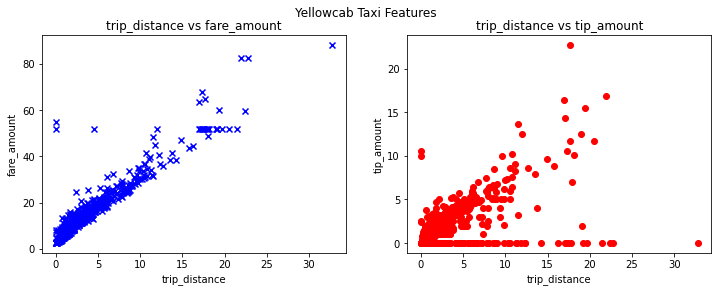

In [82]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].scatter(df.trip_distance,df.fare_amount,marker='x',color='blue')
ax[1].scatter(df.trip_distance,df.tip_amount,color='red');

ax[0].set_xlabel('trip_distance')
ax[1].set_xlabel('trip_distance')

ax[0].set_ylabel('fare_amount'), ax[1].set_ylabel('tip_amount')

ax[0].set_title('trip_distance vs fare_amount')
ax[1].set_title('trip_distance vs tip_amount')

fig.suptitle('Yellowcab Taxi Features');

# Plotting via Pandas

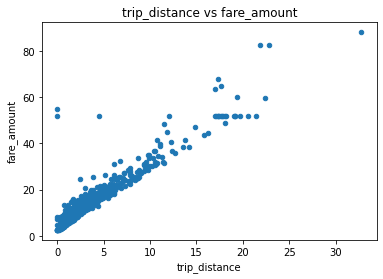

In [83]:
ax = df.plot.scatter(x='trip_distance',y='fare_amount');
ax.set_title('trip_distance vs fare_amount');

# Univariate Distribution: Histogram

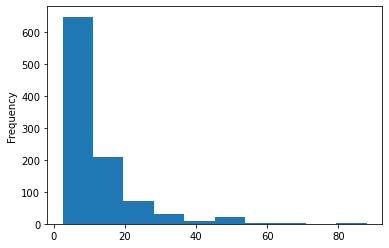

In [84]:
df.fare_amount.plot.hist();

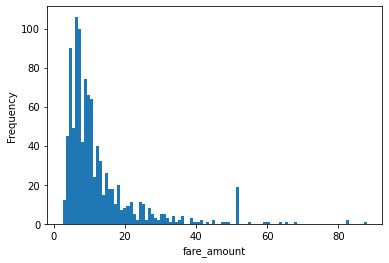

In [85]:
ax = df.fare_amount.plot.hist(bins=100)
ax.set_xlabel('fare_amount');

# Univariate Distribution: Histogram

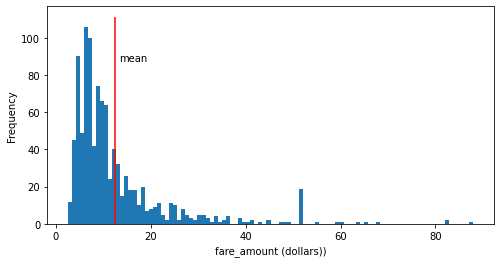

In [86]:
fig,ax = plt.subplots(1,1,figsize=(8,4));

df.fare_amount.plot.hist(bins=100, ax=ax);
ax.set_xlabel('fare_amount (dollars))');

# add a vertical line
ax.vlines(df.fare_amount.mean(),*ax.get_ylim(),color='r');

# add some text
ax.text(df.fare_amount.mean()+1,ax.get_ylim()[1]*.75,'mean');

# Subplots with Pandas

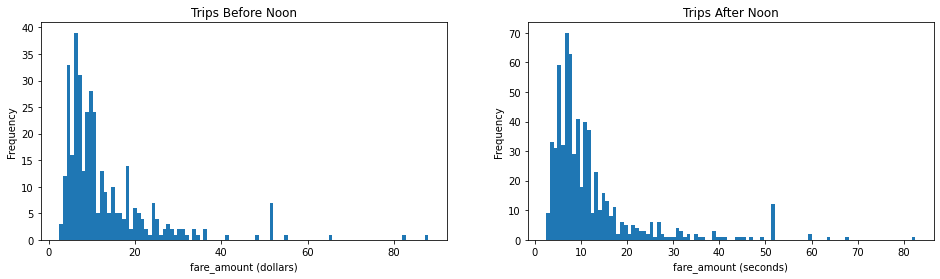

In [87]:
fig,ax = plt.subplots(1,2,figsize=(16,4))
df[df.pickup_datetime.dt.hour < 12].fare_amount.plot.hist(bins=100,ax=ax[0]);
ax[0].set_xlabel('fare_amount (dollars)');
ax[0].set_title('Trips Before Noon');
df[df.pickup_datetime.dt.hour >= 12].fare_amount.plot.hist(bins=100,ax=ax[1]);
ax[1].set_xlabel('fare_amount (seconds)');
ax[1].set_title('Trips After Noon');

# Sharing Axes

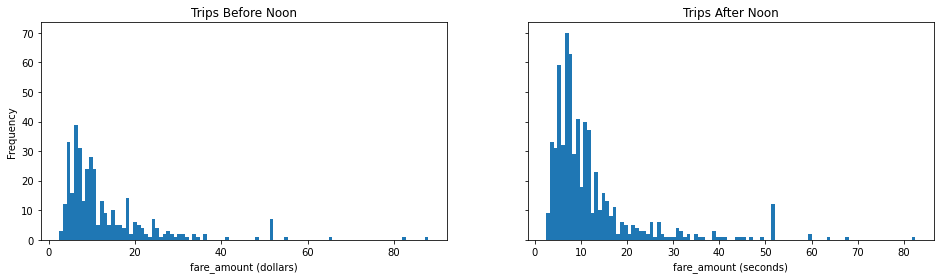

In [88]:
fig,ax = plt.subplots(1,2,figsize=(16,4), sharey=True)

df[df.pickup_datetime.dt.hour < 12].fare_amount.plot.hist(bins=100,ax=ax[0]);
ax[0].set_xlabel('fare_amount (dollars)');
ax[0].set_title('Trips Before Noon');
df[df.pickup_datetime.dt.hour >= 12].fare_amount.plot.hist(bins=100,ax=ax[1]);
ax[1].set_xlabel('fare_amount (seconds)');
ax[1].set_title('Trips After Noon');

# Plotting with Seaborn

- Python data visualization library 
- Based on matplotlib. 
- It provides a high-level interface for drawing attractive and informative statistical graphics.
<br>
<br>

<div align='center'><img src="images/seaborn_examples.png"></div>

**NOTE!!:** Upgrade to 0.11 as of September 2020
```sh
$ conda install -n eods-f20 seaborn
```

In [89]:
import seaborn as sns
sns.__version__

'0.11.0'

# Univariate Distribution with Seaborn Histplot

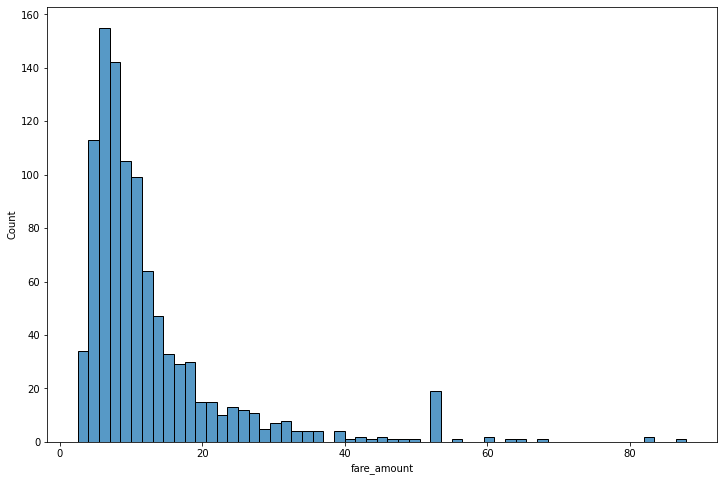

In [90]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

sns.histplot(df.fare_amount,ax=ax);

# Univariate Distribution: Histogram with KDE and Rugplot

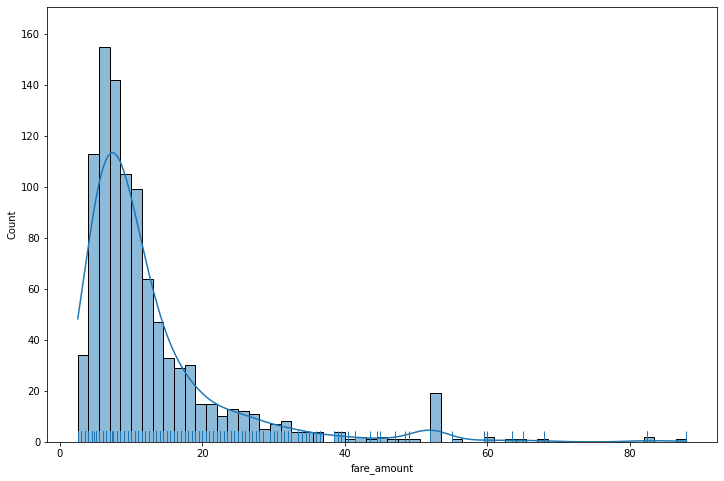

In [91]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

sns.histplot(df.fare_amount,kde=True,ax=ax);
sns.rugplot(df.fare_amount);

# Aside: KDE

<div align="center"><img src='images/kde2.png' width="500px">
<img src='images/kde3.png' width="500px"></div>

# Seaborn Styles

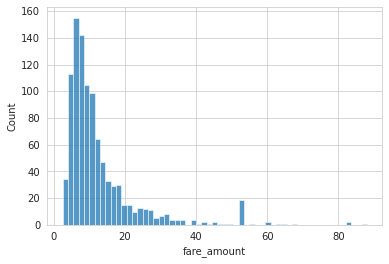

In [92]:
# for a single plot using a context
with sns.axes_style('whitegrid'):
    sns.histplot(df.fare_amount);

In [93]:
# set style globally
sns.set_style('darkgrid')

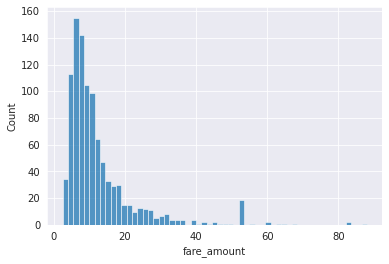

In [94]:
sns.histplot(x=df.fare_amount);

# Univariate Distributions: Boxplot

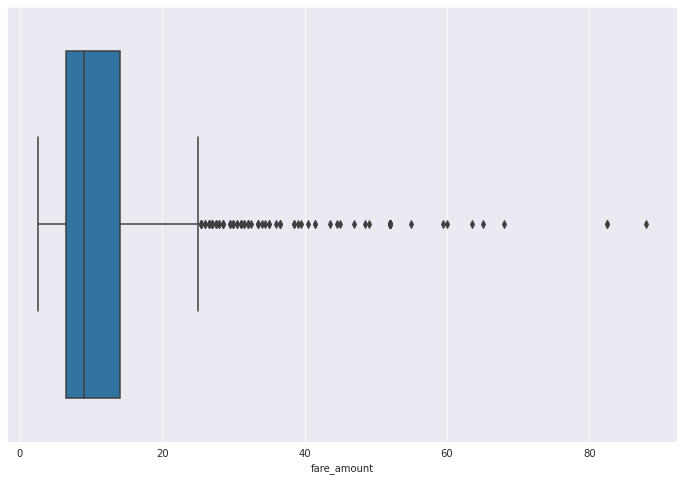

In [95]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

sns.boxplot(x=df.fare_amount,ax=ax);

# Univariate Distributions: Boxplot

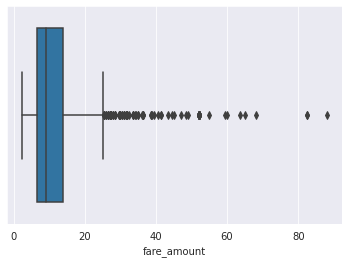

In [96]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

sns.boxplot(x=df.fare_amount,ax=ax);

- first quartile
- second quartile (Median)
- third quartile
- whiskers (usually 1.5*IQR)
- outliers

# Combining Plots with Subplots

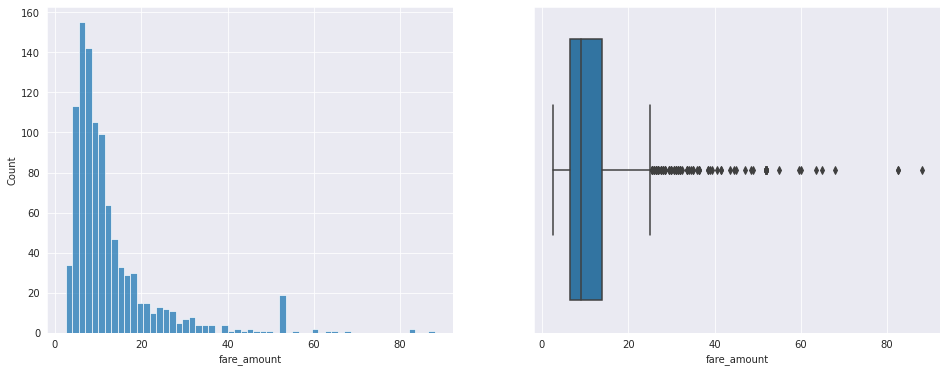

In [97]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

sns.histplot(x=df.fare_amount, ax=ax[0]);
sns.boxplot(x=df.fare_amount, ax=ax[1]);

# Other Univariate Distribution Visualizations

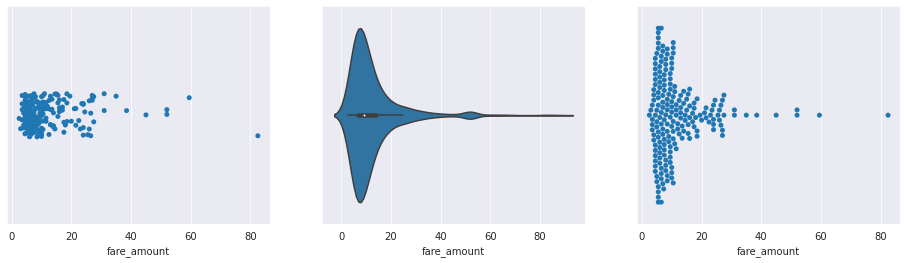

In [98]:
fig,ax = plt.subplots(1,3,figsize=(16,4))

sns.stripplot(x='fare_amount',data=df[:200],ax=ax[0])
sns.violinplot(x='fare_amount',data=df,ax=ax[1])
sns.swarmplot(x='fare_amount',data=df[:200],ax=ax[2]);

# Bivariate: Evaluating Correlation

- **Correlation:** the degree to which two variables are linearly related
<br>

- Pearson Correlation Coefficient: $\rho_{XY} = \frac{cov(X,Y)}{\sigma_X\sigma_Y}$
<br>

- Sample Correlation: $r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{(n-1)s_xs_y}$
<br>

- Takes values between:

 - -1 (highly negatively correlated)
 - 0 (not correlated)
 - 1 (highly positively correlated)


In [99]:
df.trip_distance.corr(df.fare_amount)

0.9487010768978081

In [100]:
from scipy.stats import pearsonr
r,p = pearsonr(df.trip_distance, df.fare_amount)
r,p

(0.9487010768978079, 0.0)

# Pearson Correlation

<div align="center"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/640px-Correlation_examples2.svg.png?1601266296038" width="1000px"></center>

# Bivariate: Scatterplot

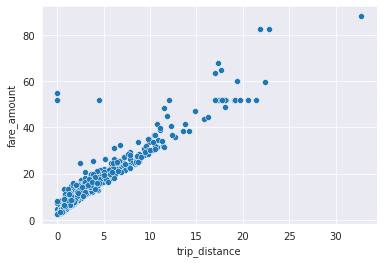

In [101]:
sns.scatterplot(x='trip_distance',y='fare_amount',data=df);

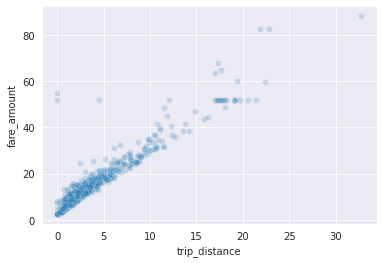

In [102]:
sns.scatterplot(x='trip_distance',y='fare_amount',data=df,alpha=0.2);

# Bivariate: Add Regression Line

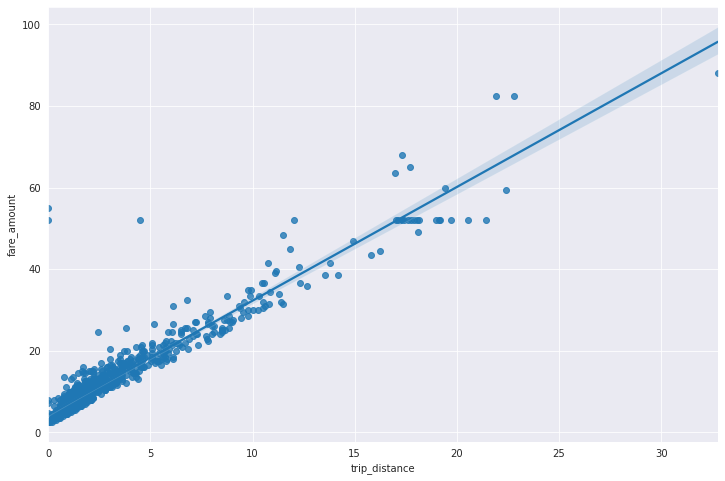

In [103]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(x='trip_distance',y='fare_amount',data=df,ax=ax);

# Bivariate: Joint Plot

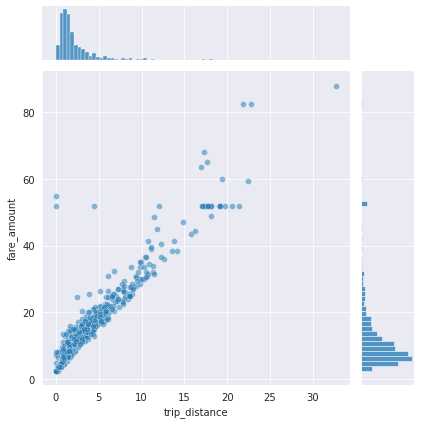

In [104]:
sns.jointplot(x='trip_distance',y='fare_amount',data=df,alpha=0.5);

# Bivariate: Joint Plot with KDE

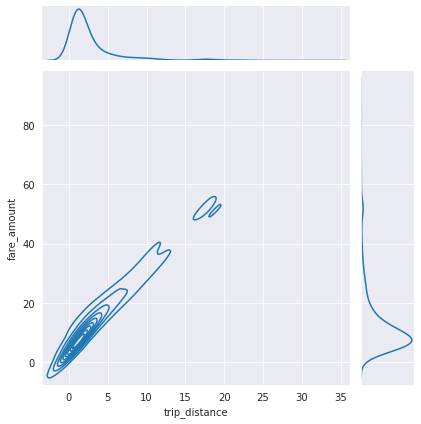

In [105]:
sns.jointplot(x='trip_distance', y='fare_amount',
              data=df,
              kind='kde');

# Comparing Multiple Variables with `pairplot`

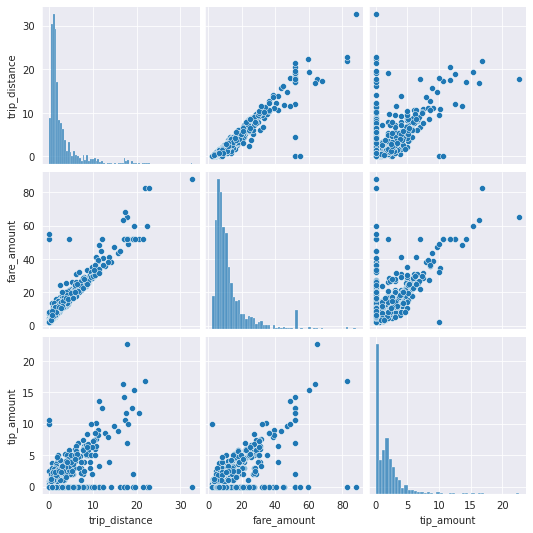

In [106]:
sns.pairplot(df[['trip_distance','fare_amount','tip_amount']]);


# Categorical Variables: Frequency

In [107]:
df.payment_type.value_counts()

Credit card    663
Cash           335
No charge        2
Name: payment_type, dtype: int64

In [108]:
df.payment_type.value_counts(normalize=True)

Credit card    0.663
Cash           0.335
No charge      0.002
Name: payment_type, dtype: float64

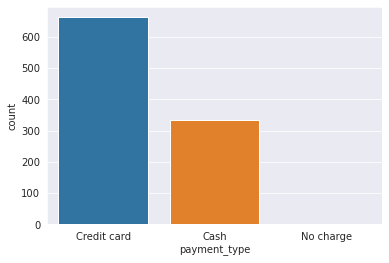

In [109]:
sns.countplot(x=df.payment_type);

# Plotting Numeric and Categorical

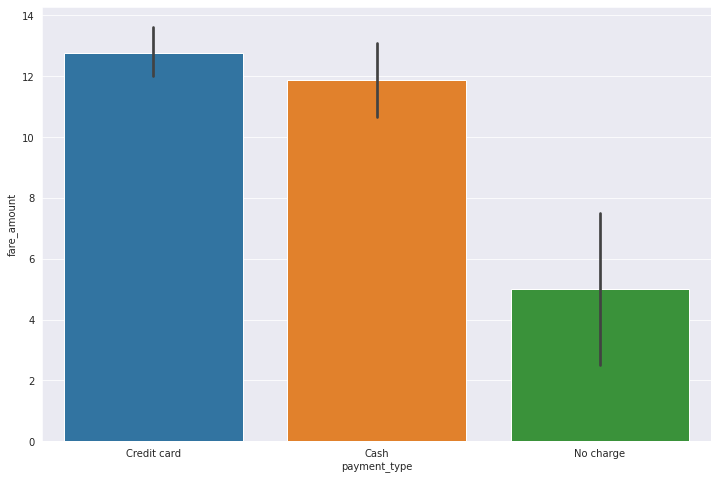

In [110]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

sns.barplot(x='payment_type',y='fare_amount',data=df);

# Plotting with Hue

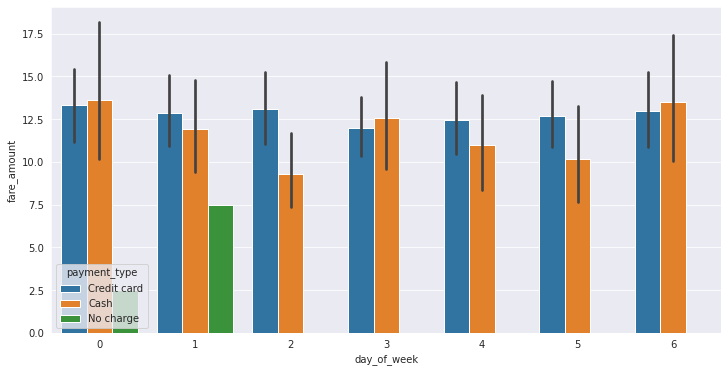

In [111]:
# Adding Another Categorical
df['day_of_week'] = df.pickup_datetime.dt.dayofweek

fig,ax = plt.subplots(1,1,figsize=(12,6))

sns.barplot(x='day_of_week',
            y='fare_amount',
            hue='payment_type',
            data=df);

# Same Axis, Multiple Plots with Seaborn

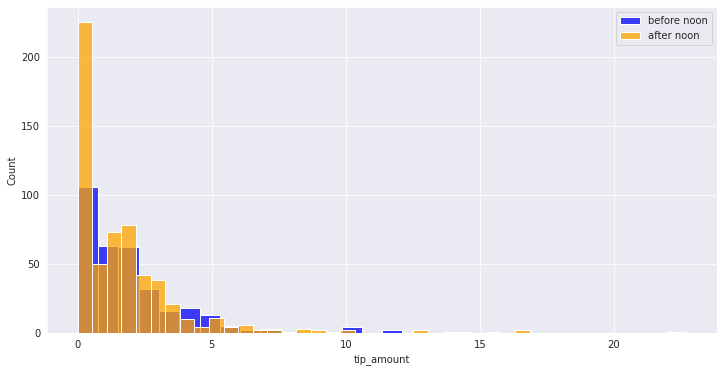

In [112]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.histplot(df[df.pickup_datetime.dt.hour < 12].tip_amount, label='before noon',color='blue',ax=ax);
sns.histplot(df[df.pickup_datetime.dt.hour >= 12].tip_amount, label='after noon',color='orange',ax=ax);
plt.legend(loc='best');

# Data Exploration and Viz Review

- central tendencies: mean, median
- spread: variance, std deviation, IQR
- correlation: pearson correlation coefficient
- plotting real valued variables: histogram, scatter, regplot
- plotting categorical variables: count, bar
- plotting interactions: jointplot, pairplot

<br>
<br>

# <center>Questions?</center>
<br>
<br>
